In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Método Word embeddings

# Load the IMDB dataset with a vocabulary size of 10,000
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad the sequences to a maximum length of 256 words
maxlen = 256
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build a neural network model with an embedding layer, dropout, and regularization
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.7))
model.add(Dense(1, activation="sigmoid", kernel_regularizer=regularizers.l2(0.001)))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the neural network model on the word embedding sequences
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the neural network model on the word embedding sequences
train_acc = model.evaluate(x_train, y_train)[1]
test_acc = model.evaluate(x_test, y_test)[1]

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

# Guardar el modelo entrenado
model.save("modelo.h5")


Epoch 1/10
782/782 [==============================] - 25s 29ms/step - loss: 0.6242 - accuracy: 0.7398 - val_loss: 0.5263 - val_accuracy: 0.8252
Epoch 2/10
782/782 [==============================] - 21s 26ms/step - loss: 0.4654 - accuracy: 0.8528 - val_loss: 0.4425 - val_accuracy: 0.8598
Epoch 3/10
782/782 [==============================] - 23s 29ms/step - loss: 0.4089 - accuracy: 0.8794 - val_loss: 0.4156 - val_accuracy: 0.8657
Epoch 4/10
782/782 [==============================] - 20s 26ms/step - loss: 0.3807 - accuracy: 0.8915 - val_loss: 0.3969 - val_accuracy: 0.8740
Epoch 5/10
782/782 [==============================] - 22s 29ms/step - loss: 0.3607 - accuracy: 0.8982 - val_loss: 0.3848 - val_accuracy: 0.8786
Epoch 6/10
782/782 [==============================] - 22s 28ms/step - loss: 0.3451 - accuracy: 0.9042 - val_loss: 0.3764 - val_accuracy: 0.8793
Epoch 7/10
782/782 [==============================] - 21s 27ms/step - loss: 0.3324 - accuracy: 0.9086 - val_loss: 0.3682 - val_accuracy:

782/782 [==============================] - 3s 4ms/step


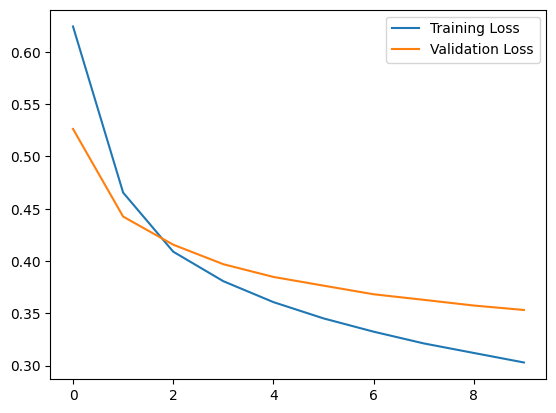

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Obtener las predicciones del modelo en los datos de prueba
y_pred = model.predict(x_test)

# Convertir las probabilidades a etiquetas binarias
y_pred = np.round(y_pred)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la evolución del loss y accuracy durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()



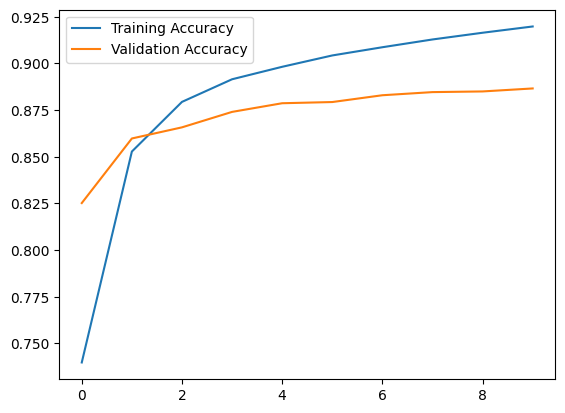

Confusion Matrix:
[[11030  1470]
 [ 1366 11134]]


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Imprimir la matriz de confusión
print('Confusion Matrix:')
print(cm)

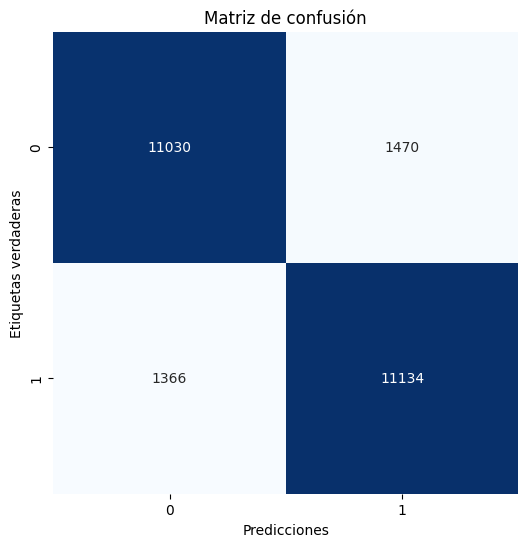

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.show()


In [ ]:
# Prompt the user to enter a review for classification
user_review = input("Enter a review for classification: ")
#the movie was stupid weird :egative
#ice movie : ositive
#Encouraged by the positive comments about this film on here I was looking forward to watching this f...   :egative
#If you like original gut wrenching laughter you will like this movie. If you are young or old then y...   :ositive

# Tokenize the user's review using the IMDB dataset's word index
word_index = imdb.get_word_index()
user_tokens = [word_index[word] if word in word_index else 0 for word in user_review.split()]

# Pad the user's tokens to a maximum length of 256 words
user_padded = pad_sequences([user_tokens], maxlen=maxlen)

# Use the trained model to predict the sentiment of the user's review
prediction = model.predict(user_padded)[0][0]

# Print the predicted sentiment
if prediction >= 0.5:
    print(f"Prediction: {prediction}")
    print("Positive review!")
else:
    print(f"Prediction: {prediction}")
    print("Negative review.")

Enter a review for classification: If you like original gut wrenching laughter you will like this movie. If you are young or old then y...
1/1 [==============================] - 0s 21ms/step
Prediction: 0.6039382815361023
Positive review!
